In [ ]:
#install packages needed
!pip install bertopic datasets openai datamapplot

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.7 MB/s eta 0:00:00
  Created

In [ ]:
# loading the datasets from hugging face which is arxiv preprint
from datasets import load_dataset
dataset = load_dataset("maartengr/arxiv_nlp")["train"]

abstracts = dataset["Abstracts"]
titles = dataset["Titles"]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/617 [00:00<?, ?B/s]

data.csv:   0%|          | 0.00/53.2M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
#Embedding based on title of the datasets (vector embedding) using sentence transformer
from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer('thenlper/gte-small')
embeddings = embedding_model.encode(titles, show_progress_bar=True)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/68.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1405 [00:00<?, ?it/s]

In [ ]:
embeddings.shape

(44949, 384)

In [ ]:
#reducing the vector representation of the titles to 3 components using PCA
from sklearn.decomposition import PCA

# Use PCA to reduce the input embeddings from 384 dimensions to 5 dimensions
pca_model = PCA(n_components=8, random_state=2)
reduced_embeddings = pca_model.fit_transform(embeddings)


In [ ]:
#getting clustering of the reduced components using HDBSCAN based on hierarchy density
from hdbscan import HDBSCAN

# We fit the model and extract the clusters
hdbscan_model = HDBSCAN(
    min_cluster_size=60, metric='euclidean', cluster_selection_method='eom'
).fit(reduced_embeddings)
clusters = hdbscan_model.labels_

len(set(clusters))

4

In [ ]:
#check the clustering to see how the cluster is being done. We should see similarity in the text which shows why they are embeded together
import numpy as np

# Print first three documents in cluster 0
cluster = 2 ## Sign language
for index in np.where(clusters==cluster)[0][:3]:
    print(abstracts[index][:300] + "... \n")

  One of the biggest challenges in the development and deployment of spoken
dialogue systems is the design of the spoken language generation module. This
challenge arises from the need for the generator to adapt to many features of
the dialogue domain, user population, and dialogue context. A promis... 

  Our goal in this paper is to establish a means for a dialogue platform to be
able to cope with open domains considering the possible interaction between the
embodied agent and humans. To this end we present an algorithm capable of
processing natural language utterances and validate them against kn... 

  Text segmentation task is an essential processing task for many of Natural
Language Processing (NLP) such as text summarization, text translation,
dialogue language understanding, among others. Turns segmentation considered
the key player in dialogue understanding task for building automatic
Human... 



In [ ]:
#for visulaization reducing to 2 components
import pandas as pd
pca_model = PCA(n_components=2, random_state=2)
reduced_embeddings = pca_model.fit_transform(embeddings)

# Create dataframe
df = pd.DataFrame(reduced_embeddings, columns=["x", "y"])
df["title"] = titles
df["cluster"] = [str(c) for c in clusters]

# Select outliers and non-outliers (clusters)
clusters_df = df.loc[df.cluster != "-1", :]
outliers_df = df.loc[df.cluster == "-1", :]

(-0.2752245247364044,
 0.3083905756473541,
 -0.276775524020195,
 0.28895793855190277)

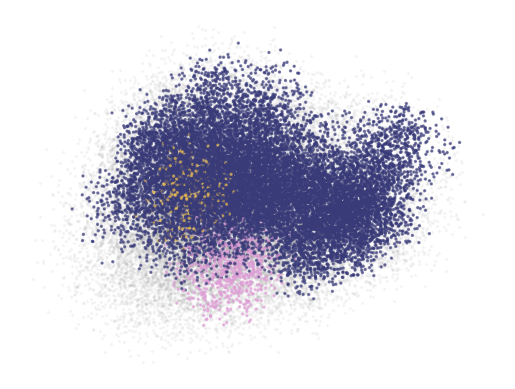

In [ ]:
import matplotlib.pyplot as plt

# Plot outliers and non-outliers seperately
plt.scatter(outliers_df.x, outliers_df.y, alpha=0.05, s=2, c="grey")
plt.scatter(
    clusters_df.x, clusters_df.y, c=clusters_df.cluster.astype(int),
    alpha=0.6, s=2, cmap='tab20b'
)
plt.axis('off')


In [ ]:
#modelling the text. The above codes was just text clustering
!pip install bertopic datasets openai datamapplot

In [ ]:
# Load data from huggingface
from datasets import load_dataset
dataset = load_dataset("maartengr/arxiv_nlp")["train"]

# Extract metadata
abstracts = dataset["Abstracts"]
titles = dataset["Titles"]

In [ ]:
from sentence_transformers import SentenceTransformer

# Create an embedding for each abstract
embedding_model = SentenceTransformer('thenlper/gte-small')
embeddings = embedding_model.encode(titles, show_progress_bar=True)

Batches:   0%|          | 0/1405 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
pca_model = PCA(n_components=8, random_state=2)
reduced_embeddings = pca_model.fit_transform(embeddings)

In [ ]:
from hdbscan import HDBSCAN

# We fit the model and extract the clusters
hdbscan_model = HDBSCAN(
    min_cluster_size=60, metric='euclidean', cluster_selection_method='eom'
).fit(reduced_embeddings)

In [ ]:
topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=pca_model,
    hdbscan_model=hdbscan_model,
    verbose=True
).fit(abstracts, embeddings)

2024-11-24 22:36:02,511 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-24 22:36:02,704 - BERTopic - Dimensionality - Completed ✓
2024-11-24 22:36:02,710 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-24 22:36:38,960 - BERTopic - Cluster - Completed ✓
2024-11-24 22:36:38,983 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-24 22:36:49,350 - BERTopic - Representation - Completed ✓


In [ ]:
topic_model.get_topic_info()

Topic  Count                   Name  \
0     -1  28641       -1_the_of_and_to   
1      0  15365        0_the_of_and_to   
2      1    624  1_the_dialogue_to_and   
3      2    319  2_the_question_to_and   

                                      Representation  \
0      [the, of, and, to, in, we, for, on, that, is]   
1      [the, of, and, to, in, we, for, on, that, is]   
2  [the, dialogue, to, and, of, in, we, on, for, ...   
3  [the, question, to, and, of, questions, qa, an...   

                                 Representative_Docs  
0  [  The amount of information stored in the for...  
1  [  Sentence semantic understanding is a key to...  
2  [  As an essential component in task-oriented ...  
3  [  In recent years researchers have achieved c...

In [ ]:
#searching using specific key words
topic_model.find_topics("topic modeling")

([-1, 0, 2, 1], [0.91360474, 0.9126803, 0.8955155, 0.8925925])

In [ ]:
topic_model.topics_[titles.index('Attention Is All You Need')]

-1

In [ ]:
# Visualize
fig = topic_model.visualize_documents(
    titles,
    reduced_embeddings=reduced_embeddings,
    width=1200,
    hide_annotations=True
)

fig.update_layout(font=dict(size=16))

In [ ]:
topic_model.visualize_barchart()
topic_model.visualize_heatmap(n_clusters=1)
topic_model.visualize_hierarchy()